<a href="https://colab.research.google.com/github/vpandey6398/rock-paper-scissor/blob/master/customer_churn_predictiom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import pandas as pd
df=pd.read_csv("/Telco_Customer_Churn_Expanded.csv")

In [213]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [214]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [215]:
df.set_index('customerID', inplace=True)

In [216]:
df.shape

(7043, 20)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

Data Cleaning

In [218]:
# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)

In [219]:
#convert to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [220]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [221]:
df.dropna(subset='TotalCharges', axis=0, inplace=True)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [223]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [224]:
#check duplicate entreies
df.index.duplicated().sum()

np.int64(0)

In [225]:
#Encode churn: No=0,Yes=1
df['Churn']=df['Churn'].str.strip().map({'No':0 , 'Yes':1})

In [226]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Exploratory Data Analysis

In [227]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [228]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [229]:
#check class distribution
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
0,73.421502
1,26.578498


Visualize Categorical Features vs Churn

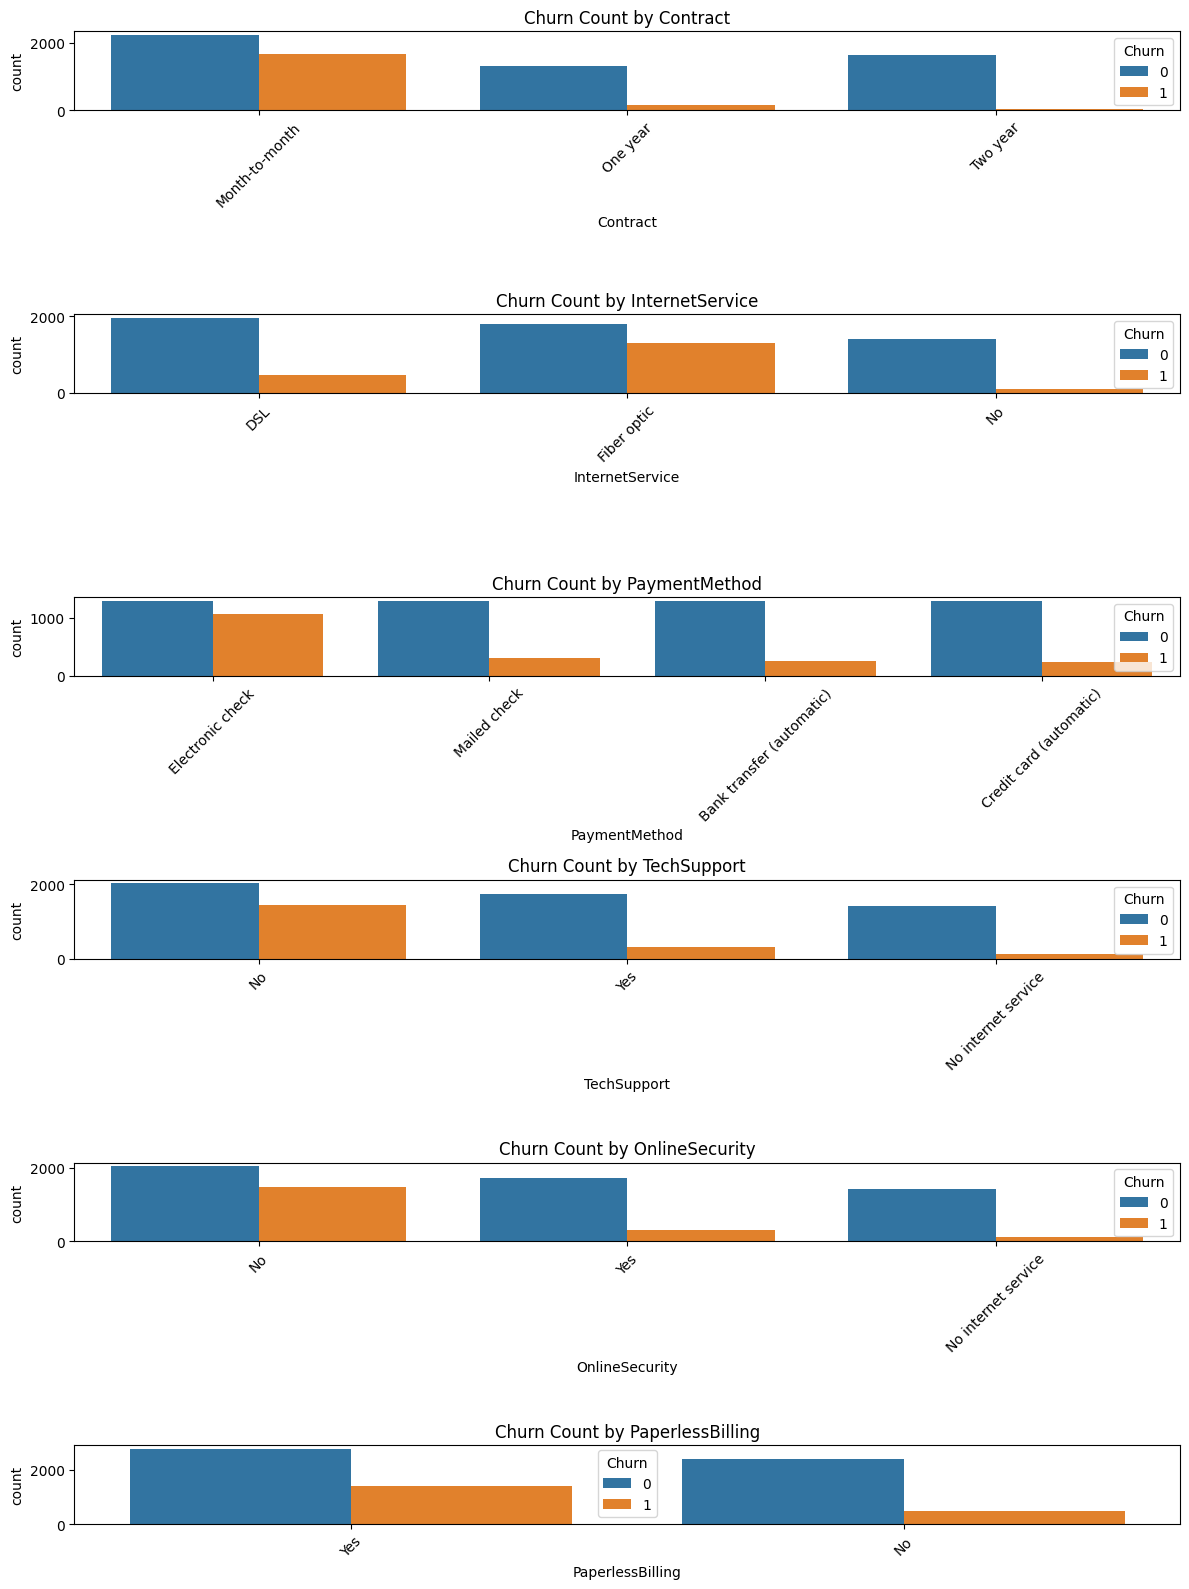

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

#set the figure size
plt.figure(figsize=(12,16))

useful_cat_features=[
    'Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity', 'PaperlessBilling'
]
for i, col in enumerate(useful_cat_features, 1):
  plt.subplot(len(useful_cat_features), 1, i)
  sns.countplot(data=df, x=col, hue='Churn')
  plt.title(f'Churn Count by {col}')
  plt.xticks(rotation=45)
  plt.tight_layout()

  plt.show

Visualize Numeric features vs Churn

ValueError: Could not interpret value `tennure` for `y`. An entry with this name does not appear in `data`.

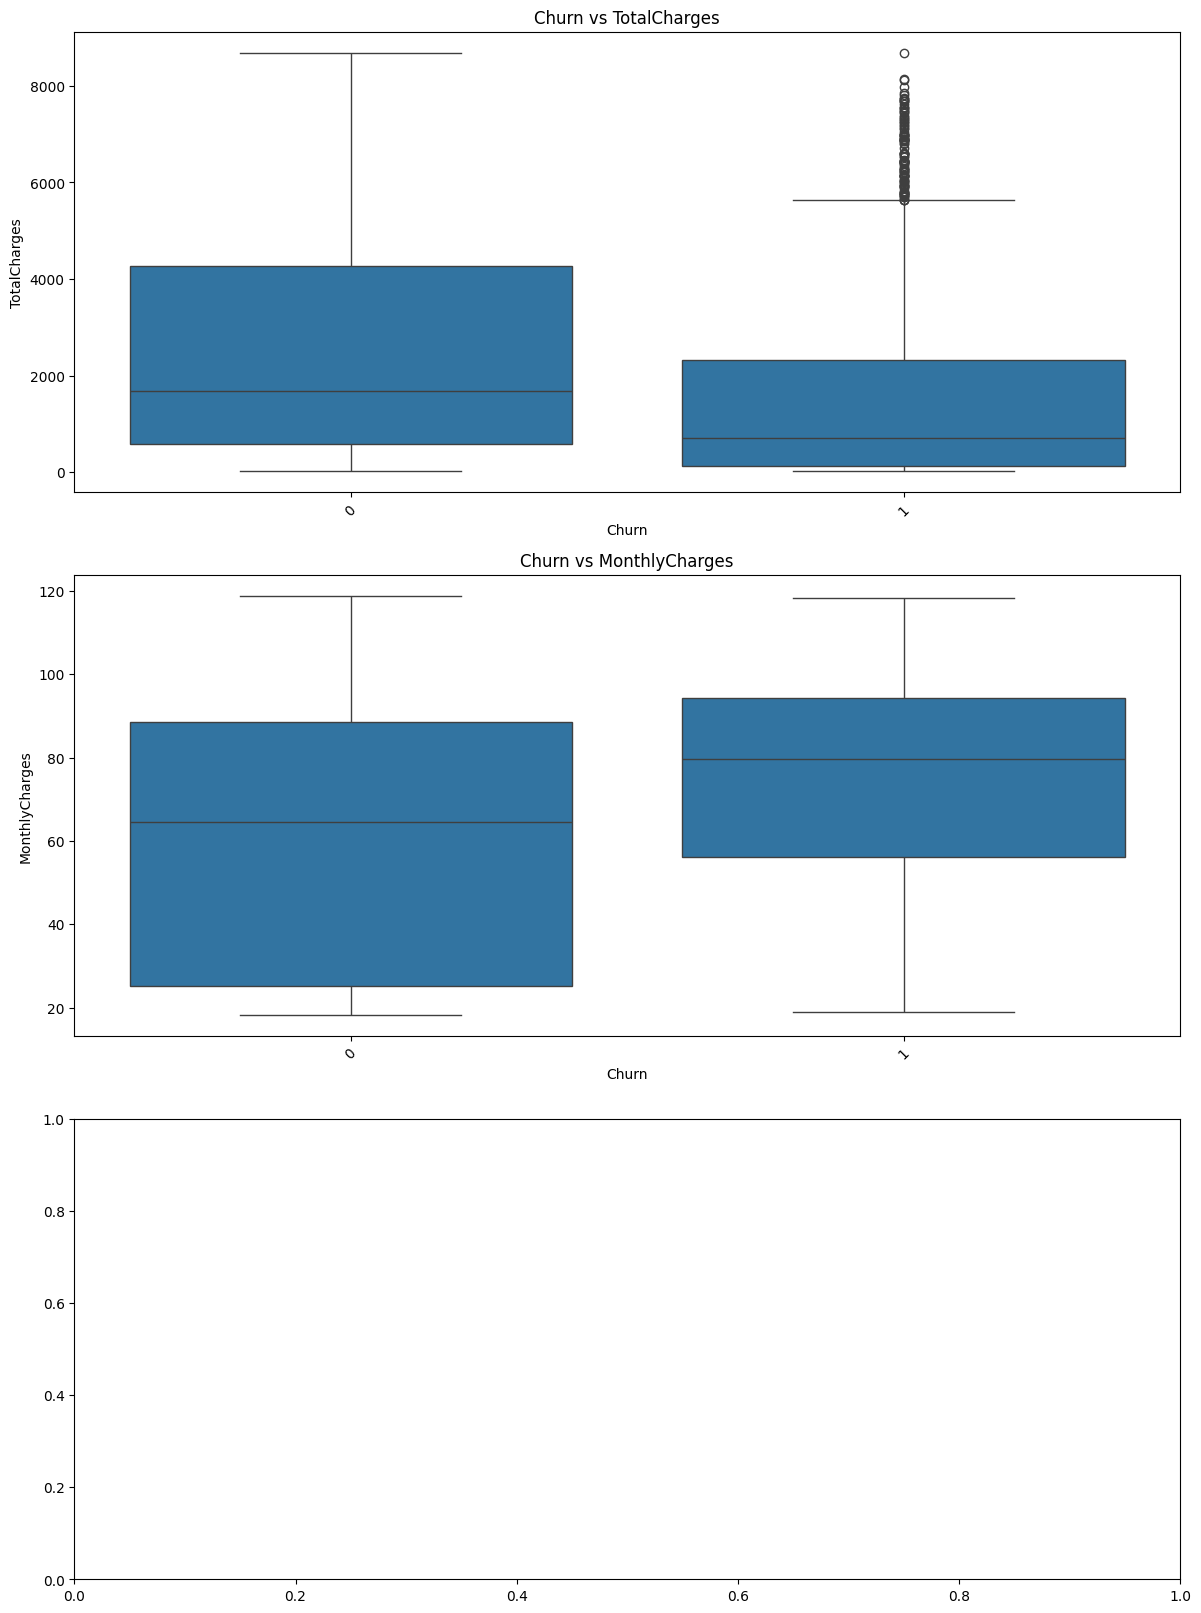

In [231]:
num_features = ['TotalCharges', 'MonthlyCharges', 'tennure']
plt.figure(figsize=(12, 16))

for i, col in enumerate(num_features, 1):
  plt.subplot(len(num_features), 1, i)
  sns.boxplot(data=df, x='Churn', y=col)
  plt.title(f'Churn vs {col}')
  plt.xticks(rotation=45)
  plt.tight_layout()

  plt.show

Correlation Heatmap (for numeric features)

In [ ]:
#select only numeric features
df_numeric = df.select_dtypes(include=['number'])
#compute correlation matrix
corr = df_numeric.corr()
#plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Data Preprocessing

**Encoding Categorical Variables**

In [ ]:
#get only object type columns
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

In [ ]:
#seperate binary and multi-class features
binary_features =[col for col in cat_cols if df[col].nunique() == 2]
multi_class_features = [col for col in cat_cols if df[col].nunique()>2]


In [ ]:
binary_features

In [ ]:
multi_class_features

In [ ]:
# if you want a more format way
summary = pd.Dataframe({
    'Feature': cat_cols,
    'Unique Values': [df[col].nunique() for col in cat_cols],
    "Type" : ["Binary" if df[col].nunique() == 2 else "Multi-class" for col in cat_cols]
})
summary.sort_values(by='Unique Values')

**Encoding categorical features**

In [ ]:
from sklearn.preprocessing import LabelEncoder

#label encoding for binary class
le = LabelEncoder()
for col in binary_features:
  df[col] = le.fit_transform(df[col])

In [ ]:
df[binary_features].head()

one hot encoding for multi class

In [ ]:
df = pd.get_dummies(df, columns=multi_class_features, drop_first=True)

In [ ]:
df.head()

In [ ]:
# Identify bool columns
bool_cols = df.select_dtypes(include=['bool']).columns

# Convert bool columns to int
df[bool_cols] = df[bool_cols].astype(int)

In [ ]:
df.head()

**Feature Scalling**


*   scaling numerical features,like tenure,MonthlyCharges, and TotalCharges, to ensure consistent value ranges



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['Tenure', 'TotalCharges', 'MonthlyCharges']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df[numeric_cols]

**Seprate Features and Target Variable**
* X: the input features(independent variables)
* y: the target variable(what we want to predict)

In [ ]:
# Target variable
y = df['Churn']

x=df.drop('churn', axis=1)

**Train Test Split**
* Training set: Used to Train the model.
* Testing set: Used to assess performance on unseen data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Handle Class Imbalance in Trainig Data**

since our dataset is imbalanced-with around 73"% 'No' and 27% 'Yes' for churn - it's important to balance the classes in the training set.This ensures the model does not become biased toward the majority class

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_resampled.value_counts()

**Build a Model Pipeline**

A pipeline allows you to:

* organizing preprocessing and model training into a single workflow

* Ensure consistent application of transformations

* prevent data leakage




In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


**Tranin and evaluate the models**

In [ ]:
# Models to compare
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

In [232]:
from sklearn.metrics import roc_auc_score

#pipelines
for name, model in models.items():
  pipe = Pipeline([
      ('scaler', StandardScaler()),
      ('model', model)
  ])
  # Fit the pipeline
  pipe.fit(x_train_resampled, y_train_resampled)

  y_pred = pipe.predict(x_test)
  y_pred_proba = pipe.predict_proba(x_test)[:, 1] # Get probability of positive class

  print(f"Model: {name}")

  report = classification_report(y_test, y_pred)
  print("Classification Report:")
  print(report)

  auc = roc_auc_score(y_test, y_pred_proba)
  print(f"AUC: {auc:.4f}")
  print("-" * 50)

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1033
           1       0.57      0.68      0.62       374

    accuracy                           0.78      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.78      0.78      1407

AUC: 0.8259
--------------------------------------------------
Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1033
           1       0.54      0.59      0.56       374

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407

AUC: 0.8068
--------------------------------------------------
Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81